# The Philosophy of Bayesian Inference

* Bayesians interpret a probability as a measure of belief (confidence or uncertainty) of an event occuring
* Frequentists interpret a probability as the long-run frequency of an event

In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
sns.set_context('notebook')
np.random.seed(12345)
rc = {"figure.figsize": [14, 6]}
sns.set(rc = rc)
sns.set_style("whitegrid")

## Coin-flip example

Prepare some data

In [25]:
dist = stats.beta
n_trials = [0, 1, 2, 3, 10, 50, 100, 500, 1000, 10000]
data = stats.bernoulli.rvs(p = 0.5, size = n_trials[-1])
x = np.linspace(0, 1, 5)

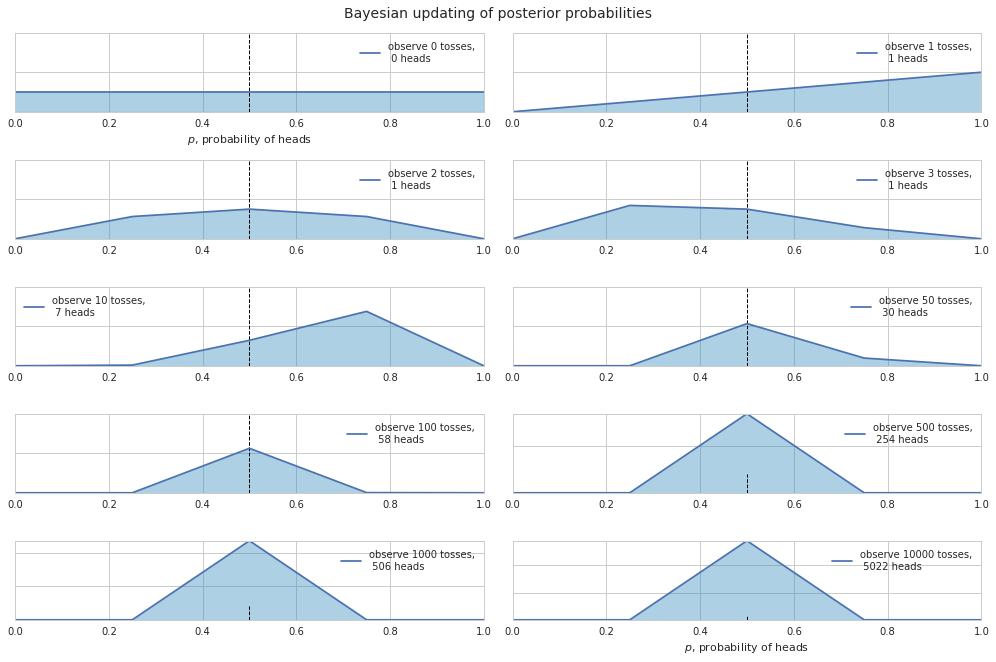

In [26]:
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

## Probability distributions

A probability distribution function assigns probabilities to the different outcomes a random variable, $Y$ can take.  
$Y$ can be:
1. Continuous: hence has a probability density function (pdf)
2. Discrete: hence has a probability mass function (pmf)
3. Mixed

## Using PyMC3

In [54]:
# use pymc3 as a generator
with pm.Model() as model_generator:
    # define prior
    prop = 0.8
    
    # define the likelihood
    obs = pm.Bernoulli("obs", p = prop)

In [63]:
# generate 1000 samples
with model_generator:
    step = pm.Metropolis()
    posterior = pm.sample(draws = 1000, step = step)

100%|██████████| 1500/1500 [00:00<00:00, 3640.12it/s]


In [64]:
obs = posterior['obs']

In [71]:
obs[:100]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0])

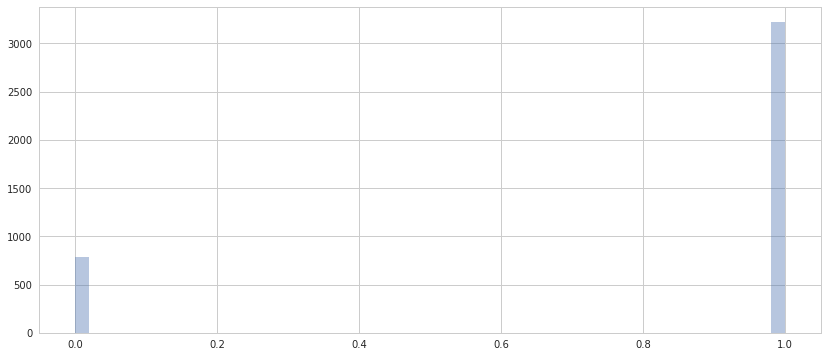

In [76]:
sns.distplot(obs, kde = False)